In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import cv2
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

path=r"myData"
labelFile=r"labels.csv"
batch_size_val=50
step_per_epoch_val=2000
epochs_val=30
imageDimensions=(32,32,3)
testRatio=0.2
validationRatio=0.2
count=0
images=[]
classNo=[]
myList=os.listdir(path)
print("total classes detected...",len(myList))
noOfClasses=len(myList)
print("importing classes....")
for x in range(noOfClasses):
    myPicList=os.listdir(path+"/"+str(count))
    for i in myPicList:
        curImg=cv2.imread(path+"/"+str(count)+"/"+i)
        images.append(curImg)
        classNo.append(count)
    print(count,end=" ")
    count+=1
print(" ")

total classes detected... 43
importing classes....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


data shapes...
train (22271, 32, 32, 3) (22271,)
validation (5568, 32, 32, 3) (5568,)
test (6960, 32, 32, 3) (6960,)
data shape and type (43, 2) <class 'pandas.core.frame.DataFrame'>
[112, 1237, 1299, 801, 1148, 1050, 227, 817, 792, 863, 1171, 737, 1206, 1251, 458, 334, 219, 647, 696, 110, 183, 182, 219, 288, 159, 863, 346, 129, 307, 148, 249, 454, 119, 388, 224, 692, 214, 120, 1183, 166, 200, 142, 121]


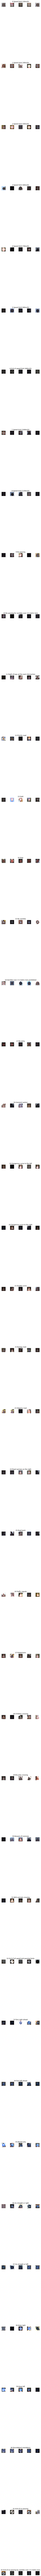

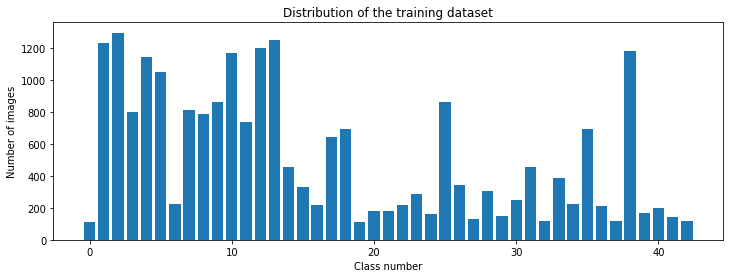

In [3]:
images=np.array(images)
classNo=np.array(classNo)

X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validationRatio)
print("data shapes...")
print("train",end=" ");
print(X_train.shape,y_train.shape)
print("validation",end=" ");
print(X_validation.shape,y_validation.shape)
print("test",end=" ");
print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0])
assert(X_validation.shape[0]==y_validation.shape[0])
assert(X_test.shape[0]==y_test.shape[0])
assert(X_train.shape[1:]==(imageDimensions))
assert(X_validation.shape[1:]==(imageDimensions))
assert(X_test.shape[1:]==(imageDimensions))



data=pd.read_csv(labelFile)
print("data shape and type",data.shape,type(data))


num_of_samples=[]
cols=5
num_classes=noOfClasses
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row["Name"])
            num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [4]:
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img

In [5]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
#cv2.imshow("GrayScale Image",X_train[random.randint(0,len(X_train)-1)])

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)


dataGen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
dataGen.fit(X_train)
batches=dataGen.flow(X_train,y_train,batch_size=10)
X_batch,y_batch=next(batches)


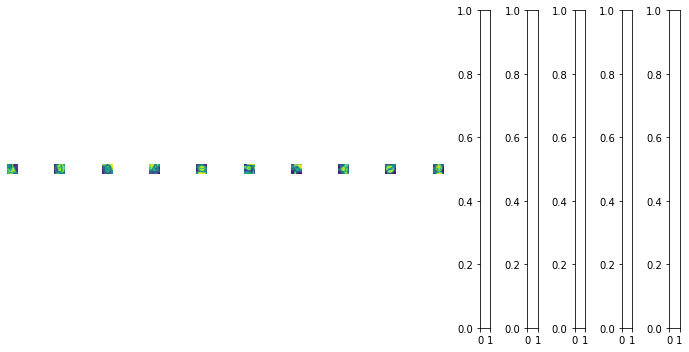

In [6]:
fig,axs=plt.subplots(1,15,figsize=(10,5))
fig.tight_layout()
for i in range(10):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis("off")
plt.show()

In [7]:
y_train=to_categorical(y_train,noOfClasses)
y_validation=to_categorical(y_validation,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)

In [8]:
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
def myModel():
    no_of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_of_Nodes=500
    model=tf.keras.models.Sequential()
    model.add((Conv2D(no_of_Filters,size_of_Filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(no_of_Filters,size_of_Filter,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add((Conv2D(no_of_Filters//2,size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_of_Filters//2,size_of_Filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])
    return model
model=myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=32),steps_per_epoch=len(X_train)//32,epochs=10,validation_data=(X_validation,y_validation),shuffle=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)         

c:\users\pc\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
695/695 [==============================] - 223s 318ms/step - loss: 2.4591 - accuracy: 0.3110 - val_loss: 0.7105 - val_accuracy: 0.7877
Epoch 2/10
695/695 [==============================] - 225s 324ms/step - loss: 1.1347 - accuracy: 0.6535 - val_loss: 0.2676 - val_accuracy: 0.9215
Epoch 3/10
695/695 [==============================] - 260s 375ms/step - loss: 0.7806 - accuracy: 0.7567 - val_loss: 0.1894 - val_accuracy: 0.9470
Epoch 4/10
695/695 [==============================] - 242s 348ms/step - loss: 0.6407 - accuracy: 0.8008 - val_loss: 0.1562 - val_accuracy: 0.9573
Epoch 5/10
695/695 [==============================] - 254s 366ms/step - loss: 0.5325 - accuracy: 0.8348 - val_loss: 0.0926 - val_accuracy: 0.9727
Epoch 6/10
695/695 [==============================] - 229s 330ms/step - loss: 0.4574 - accuracy: 0.8559 - val_loss: 0.1129 - val_accuracy: 0.9632
Epoch 7/10
695/695 [==============================] - 222s 320ms/step - loss: 0.4069 - accuracy: 0.8719 - val_loss: 0.0723 -

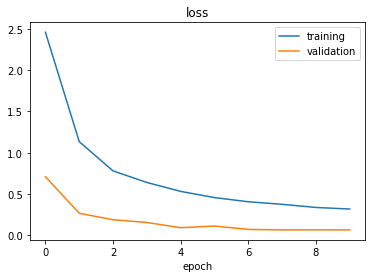

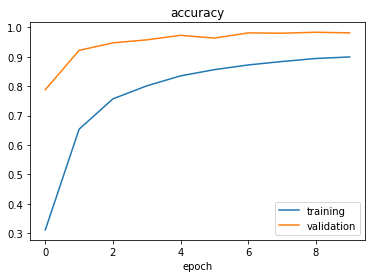

Test score: 0.06302659213542938
Test Accuracy: 0.9840517044067383


In [9]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training',"validation"])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training',"validation"])
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()
score=model.evaluate(X_test,y_test,verbose=0)
print("Test score:",score[0])
print("Test Accuracy:",score[1])
model.save("my_model.h5")